# Shoe Classification Results Ver 1.0

This notebook briefly analyses the results of the Classification model created using CNN's. The model has been created and run using seperate notebooks, please see the root directory of this notebook for more details.

In [1]:
import keras
from os import listdir
import numpy as np
from scipy import misc
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.
/Users/annacrawford/anaconda/envs/Zaincorp/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Model Architecture

In [2]:
# load json and create model
json_file = open('Version2/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Version2/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
# load up the X and y data which is required to produce a confusion matrix
X=np.load('Version2/X_Data.npy')
y=np.load('Version2/y_Data.npy')

X=X.astype("float32")

Enc=LabelEncoder()
y= Enc.fit_transform(y)

In [8]:
# Reshaping required for the model to predict
X = X.reshape(9243, 200, 200, 3)

In [9]:
# Using the same random state as the when the model was run on AWS
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
# Loading the class lists in the same order as they were run on AWS
Classes=np.load('Version2/Class_List.npy')

In [11]:
Classes

array(['boots', 'formal', 'loafers', 'sneakers'], dtype=object)

In [12]:
# Predicting the classes from the X-Data using the loaded Model
y_pred=loaded_model.predict_classes(X_test)

2773/2773 [==============================] - 148s   


In [13]:
# This function plots a confusion matrix 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [14]:
# Create confusion matrix results
cnf_matrix = confusion_matrix(y_test,y_pred)

In [15]:
# Converting the values to percentages rather then absolute values, as this highlights where the model had issues
rows = sum(cnf_matrix)
percentage = ((cnf_matrix / rows.astype(np.float))*100).round()

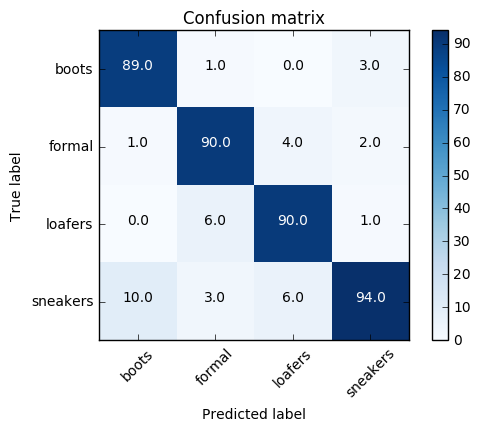

In [16]:
# Plotting the confusion matrix
plot_confusion_matrix(percentage, classes= Classes)

In [17]:
# Find the accuracy of the model using sklearns method
accuracy_score(y_test,y_pred)

0.92463036422646949

In [18]:
# Finding the accuracy of the model using Keras' in built method.
loaded_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
score=loaded_model.evaluate(X_test,keras.utils.np_utils.to_categorical(y_test))

2773/2773 [==============================] - 115s   


In [19]:
print score

[0.2330610012784036, 0.96240533720144417]


Interestingly Keras and Sklearn produce two different accuracy scores when comparing the same data, we have not had time to establish what the difference is but we expect it is within the method Keras uses to measure accuracy.

## We will now predict shoes from outside our dataset

In [20]:
# Loading a test list of shoes
Test_List=[x for x in listdir('/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images') if x[-4:]=='.jpg']

In [21]:
# Creating an array from each image
Array_List=[]
for x in Test_List:
    loc=''.join(['/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/',x])
    print loc
    im=Image.open(loc)
    ar = misc.fromimage(im)
    Array_List.append(ar)

/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/1071095_1.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/1072988_1_large.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/1077221_1.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/1077239_1.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Boots.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/boots2.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Sandal.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Test_1.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Test_2.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Test_Image_1.jpg
/Users/annacrawford/Colin/GA/Week1/CNN/Test_Images/Test_Image_2.jpg


In [22]:
# Converting the image array into one suitable for the model to predict
X=np.array(Array_List)
X=np.reshape(X,(11,200,200,3))

In [23]:
# Predicting the classes for the new images
Output_Classes=loaded_model.predict_classes(X)

11/11 [==============================] - 0s


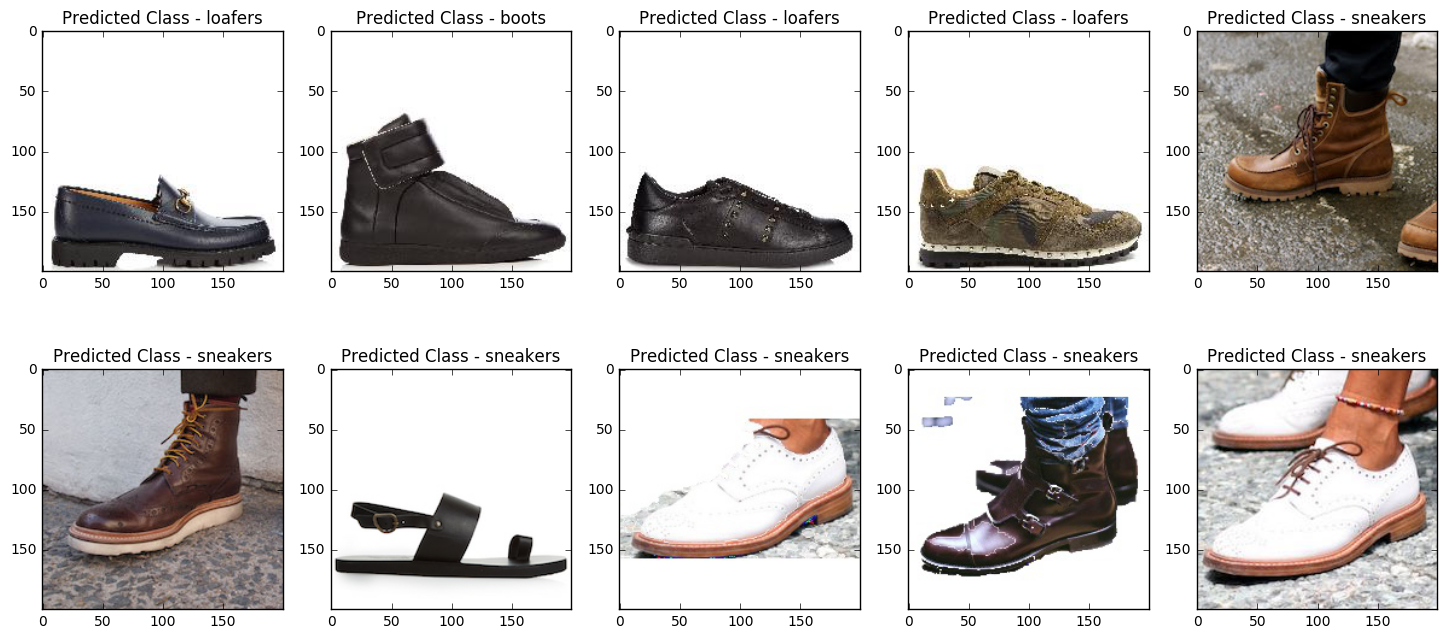

In [24]:
# Plotting the images and their predicted classes
plt.figure(figsize = (18, 8))
for x,y in zip(range(10),Output_Classes):
    plt.subplot(2, 5, x+1)
    title_str=' - '.join(['Predicted Class',Classes[y]])
    plt.title(title_str)
    plt.imshow(Array_List[x])
plt.show()